<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg"  width=400></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [12]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [13]:
np.random.seed(42)

### Linear Regression

В градиентном спуске на следующем шаге значения параметров получаются из значений на текущем шаге смещением в сторону антиградиента функции потерь:

$$W_{(k+1)} = W_{(k)} - \eta_k \nabla Q(W_{(k)}),$$
где $\eta_t$ — длина шага (learning rate).

Градиент в случае MSE выглядит следующим образом:

$$\nabla Q(W) = \frac{2}{n}X^T(X*W - Y)$$



In [28]:
class LinearRegression:
    
    def __init__(self, mae_metric=False):
    
        self.metric = self.calc_mse_metric if not mae_metric else self.calc_mae_metric
    
    def calc_mae_metric(self, preds, y):
        
        mae = (abs(y-preds)).sum()/len(preds)
        
        return mae
          
    def calc_mse_metric(self, preds, y):
        
        mse = ((y-preds)**2).sum()/len(preds)
        
        return mse
          
    
    def init_weights(self, input_size, output_size):
       
        np.random.seed(42)
       
        self.W = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size))
        self.b = np.zeros((1, output_size), dtype = float) #YOUR_CODE

    def fit(self, X, y, num_epochs=1000, lr=0.001):
        """
            Обучение модели линейной регрессии методом градиентного спуска
            @param X: размерности (num_samples, input_shape)
            @param y: размерности (num_samples, output_shape)
            @param num_epochs: количество итераций градиентного спуска
            @param lr: шаг градиентного спуска
            @return metrics: вектор значений метрики на каждом шаге градиентного
            спуска. В случае mae_metric==True вычисляется метрика MAE
            иначе MSE
        """
        self.init_weights(X.shape[1], y.shape[1])  
        metrics = []
        for _ in range(num_epochs):
            preds = self.predict(X)
            
            b_grad = np.mean((X.dot(self.W) + self.b - y), axis=0)
            W_grad = np.array(2/X.shape[0]*X.T.dot(X.dot(self.W)+self.b - y))
            
            self.W -= lr*W_grad   
            self.b -= lr*b_grad *2  
            metrics.append(self.metric(preds, y))
        return metrics

    def predict(self, X):
       
        return X@self.W+self.b  

In [29]:
model = LinearRegression()
mse = model.fit(X_train, Y_train)

NameError: name 'Y_train' is not defined

In [30]:
# Постройте график для MSE
plt.plot(mse)

NameError: name 'mse' is not defined

#### Задание 2.

1. Зафиксируйте `random.seed == 42`
2. Сгенерируйте данные с помощью `make_regression` с параметами `n_targets=3, n_features=2, noise=10, random_state=42`. С помощью `train_test_split` разделите данные на обучение и тест 
3. Обучите модель линейной регрессии с параметрами по умолчанию.

####  Задание 3.

1. Обучите модель линейной регрессии на тех же данных. В этот раз считайте MAE

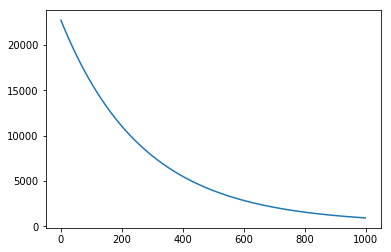

In [17]:
XX, yy = datasets.make_regression(n_targets=3, n_features=2, noise=10, random_state=42)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.33, random_state=42)

model1 = LinearRegression()
mse1 = model1.fit(XX_train, yy_train)
plt.plot(mse1)

### Логистическая регрессия

Теперь будем решать задачу классификации при помощи логистической регрессии

In [18]:
X, y = datasets.make_blobs(n_samples=10000, n_features=2, centers=2, random_state=42)
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

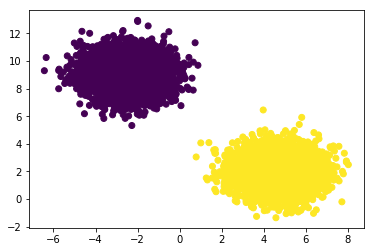

In [19]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0])
plt.show()

Небольшое напоминание по логистической регрессии:

Сигмоида
$$ \sigma(h) = \frac{1}{1 + exp(-h)} $$

Вероятность принадлежности к классу

$$ P(y = 1 | x, w) = \sigma(x, w) $$

Логистическая функция потерь

$$ L(y, p) = - \frac{1}{m}\sum_{1}^{m}(y_i log(p_i) + (1 - y_i) log(1 - p_i)) $$

In [21]:
class LogisticRegressionGD:
    '''
    A simple logistic regression for binary classification with gradient descent
    '''
    
    def __init__(self):
        pass
    
    def __extend_X(self, X):
        
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    def init_weights(self, input_size, output_size):
        """
            Инициализирует параметры модели
            W - матрица размерности (input_size, output_size)
            инициализируется рандомными числами из
            нормального распределения со средним 0 и стандартным отклонением 0.01
        """
        np.random.seed(42)
        self.W = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size))
        
    def get_loss(self, p, y):
        """
            Данный метод вычисляет логистическую функцию потерь
            @param p: Вероятности принадлежности к классу 1
            @param y: Истинные метки
        """
        #return -np.sum((y*p + (1-y)*np.log(1-p)))/y.shape[0]
        summa = sum(-(y * np.log(p) + (1 - y) * np.log(1 - p)))
        return summa / y.shape[0]
                             
    def sygmoid(self, X):
        return 1/(1+np.exp(-X))
                              
    def get_prob(self, X):
        """
            Данный метод вычисляет P(y=1|X,W)
            Возможно, будет удобнее реализовать дополнительный
            метод для вычисления сигмоиды
        """
        if X.shape[1] != self.W.shape[0]:
            X = self.__extend_X(X)
        return self.sygmoid(X @ self.W)
    
    def get_acc(self, p, y, threshold=0.5):
        """
            Данный метод вычисляет accuracy:
            acc = \frac{1}{len(y)}\sum_{i=1}^{len(y)}{I[y_i == (p_i >= threshold)]}
        """
        p[p>=threshold] = True
        p[p<threshold] = False
        y[y==1] = True
        y[y==0] = False
        return 1/y.shape[0]*np.array((np.where((y==p)))).shape[1]

    def fit(self, X, y, num_epochs=100, lr=0.001):
        
        X = self.__extend_X(X)
        self.init_weights(X.shape[1], y.shape[1])
        
        accs = []
        losses = []
        for _ in range(num_epochs):
            p = self.get_prob(X)

            W_grad = X.T @ (p-y)/y.shape[0]
            self.W -= lr*W_grad
            
            # необходимо для стабильности вычислений под логарифмом
            p = np.clip(p, 1e-10, 1 - 1e-10)
            
            log_loss = self.get_loss(p, y)
            losses.append(log_loss)
            acc = self.get_acc(p, y)
            accs.append(acc)
        
        return accs, losses

In [22]:
model = LogisticRegressionGD()
accs, losses = model.fit(X_train, y_train)

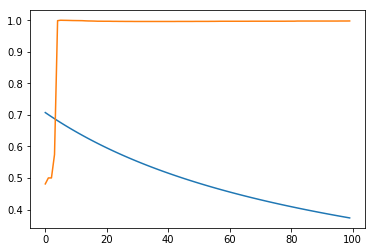

In [24]:
# графики для accuracy и для loss
plt.plot(losses, label = 'loss')
plt.plot(accs)
plt.show()


#### Задание 4

1. Реализуйте все методы класса `LogisticRegressionGD`
2. Создайте модель и обучите ее с параметрами по умолчанию на train данных
3. по полученным `accs` и  `losses` посчитайте среднее.
4. Посчитайте accuracy на test данных. `threshold=0.5`.

### Logistic regresion with SGD

Сложность вычисления в случае с GD $O(kn)$, где $k$ - размер вектора признаков, $n$ - размер всей выборки.
В случае, когда выборка очень большая, это решение становится непрактичным

GD заменяют на SGD - *Стохастический градиентный спуск*. Он отличается от обычного заменой градиента на несмещённую оценку по одному или нескольким объектам. В этом случае сложность становится  $O(kl)$ , где  $l$  — количество объектов, по которым оценивается градиент,  $l << n$.

In [25]:
def batch_generator(X, y, batch_size=100):
    
    num_samples = X.shape[0]
    num_batches = int(num_samples / batch_size)
    for i in range(num_batches-1):
        yield X[i*batch_size:(i+1)*batch_size,:], y[i*batch_size:(i+1)*batch_size] 
        
class LogisticRegressionSGD:
    def __init__(self):
        pass
    
    def __extend_X(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def init_weights(self, input_size, output_size):
        """
            Инициализирует параметры модели
            W - матрица размерности (input_size, output_size)
            инициализируется рандомными числами из
            нормального распределения со средним 0 и стандартным отклонением 0.01
        """
        np.random.seed(42)
        self.W = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size))
        
    def get_loss(self, p, y):
        summa = sum(-(y * np.log(p) + (1 - y) * np.log(1 - p)))
        return summa / y.shape[0]
    
    def sygmoid(self, X):
        return 1/(1+np.exp(-X))
                              
    def get_prob(self, X):
        
        if X.shape[1] != self.W.shape[0]:
            X = self.__extend_X(X)
        return self.sygmoid(X @ self.W)
    
    def get_acc(self, p, y, threshold=0.5):
        
        p[p>=threshold] = True
        p[p<threshold] = False
        y[y==1] = True
        y[y==0] = False
        
        return 1/y.shape[0]*np.array((np.where((y==p)))).shape[1]

    def fit(self, X, y, num_epochs=10, lr=0.001):
        
        X = self.__extend_X(X)
        self.init_weights(X.shape[1], y.shape[1])
        
        accs = []
        losses = []
        for _ in range(num_epochs):
            gen = batch_generator(X, y)
            for X_, y_ in gen:
                p = self.get_prob(X_)

                W_grad = X_.T @ (p-y_)/y_.shape[0]
                self.W -= lr*W_grad
                
                p = np.clip(p, 1e-10, 1 - 1e-10)

                log_loss = self.get_loss(p, y_)
                losses.append(log_loss)
                acc = self.get_acc(p, y_)
                accs.append(acc)
        
        return accs, losses

In [26]:
model = LogisticRegressionSGD()
accs, losses = model.fit(X_train, y_train)

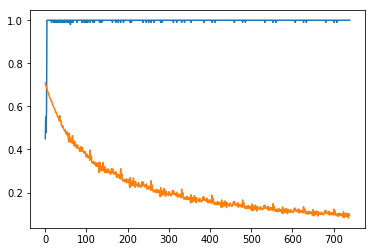

In [27]:
# графики для accuracy и для loss
plt.plot(accs)
plt.plot(losses)
plt.show()